In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# concept figure

In [2]:
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Arc, FancyArrowPatch
from numpy import radians as rad
from matplotlib.patches import Arc, RegularPolygon


def create_loop_arrow(ax, x, y, direction=1, color='grey', radius=1, lw=2, ls='-'):
    drawCirc(ax, radius, x, y + radius, -40, 260, color_=color, direction=direction, lw=lw, ls=ls)
    
def drawCirc(ax,radius,centX,centY,angle_,theta2_,color_='black', direction=1, lw=2, ls='-'):
    #========Line
    arc = Arc([centX,centY],radius,radius,angle=angle_,
          theta1=0,theta2=theta2_,capstyle='round',linestyle=ls,lw=lw,color=color_)
    ax.add_patch(arc)


    #========Create the arrow head
    endX=centX-direction*(radius/2)*np.cos(rad(theta2_+angle_)) #Do trig to determine end position
    endY=centY+(radius/2)*np.sin(rad(theta2_+angle_))

    ax.add_patch(                    #Create triangle as arrow head
        RegularPolygon(
            (endX, endY),            # (x,y)
            3,                       # number of vertices
            radius/9*lw*1.25,                # radius
            rad(np.pi*(1+direction)/2-direction*(angle_+theta2_)),     # orientation
            color=color_
        )
    )
    # ax.set_xlim([centX-radius,centY+radius]) and ax.set_ylim([centY-radius,centY+radius]) 
    # Make sure you keep the axes scaled or else arrow will distort

<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3324296/1852571717.py:33: SyntaxWarning: invalid escape sequence '\c'
  "Classical diffusion: learn $\color{#3386FF}{\mathbf{when}}$ and $\color{#3386FF}{\mathbf{where}}$ to transition",


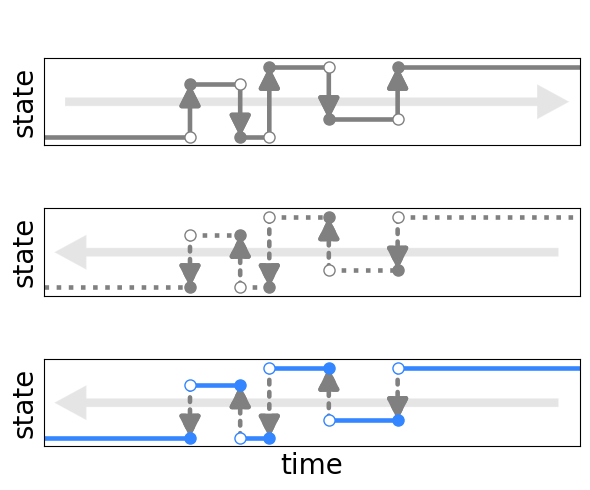

In [269]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis
fig, axs = plt.subplots(3, figsize=(6, 5))

# Define the data points
Np = 7
Ns = 5
r_shift = 0.5
rate = 0.1
lw = 3.3
rs = 1
start = 0
t_size = 25
t_min = 0.15 *  t_size
t_min_step = 0.05 *  t_size
t_max = 0.85

rate = t_size * rate
fwd_color = 'grey'
color = '#3386FF'
# g = 0.2
high_color = 'grey'#(g, g, g)
learn_ls = ':'
fwd_ls = '-'
fontsize = 15
fontsize_t = 20
same_trans = True
min_del = 2

titles = ['Foward process',
          "Classical diffusion: learn $\color{#3386FF}{\mathbf{when}}$ and $\color{#3386FF}{\mathbf{where}}$ to transition",
          "SCUD"]


arrow_props_blue = dict(arrowstyle='->', color='#3386FF', linestyle='--', linewidth=2,
                   mutation_scale=30, shrinkA=0, shrinkB=0)
for r in range(rs):
    t_1 = [np.random.exponential(rate)+t_min]
    t_2 = [np.random.exponential(rate)+t_min]
    diff = np.arange(Ns)
    diff = diff[np.abs(diff - start)>min_del]
    states_t_1 = [start, np.random.choice(diff)]
    states_t_2 = [start, np.random.choice(diff)]
    states_t_3 = [start, np.random.choice(diff)]
    for i in range(Np-1):
        t_1.append(t_1[-1] + np.random.exponential(rate)+t_min_step)
        t_2.append(t_2[-1] + np.random.exponential(rate)+t_min_step)
        diff = np.arange(Ns)
        diff = diff[np.abs(diff - states_t_1[-1])>min_del]
        states_t_1.append(np.random.choice(diff))
        diff = np.arange(Ns)
        diff = diff[np.abs(diff - states_t_3[-1])>min_del]
        states_t_3.append(np.random.choice(diff))
        diff = np.arange(Ns)
        diff = diff[np.abs(diff - states_t_2[-1])>min_del]
        states_t_2.append(np.random.choice(diff))

    if same_trans:
        states_t_3 = states_t_1
        states_t_2 = states_t_1
        t_2 = t_1
        t_3 = t_1

    t_1 = np.array(t_1)
    states_t_1 = np.array(states_t_1)
    states_t_1 = states_t_1[np.r_[[True],t_1 < t_max*t_size]]
    t_1 = t_1[t_1 < t_max*t_size]
    
    t_2 = np.array(t_2)
    states_t_2 = np.array(states_t_2)
    states_t_2 = states_t_2[np.r_[[True],t_2 < t_max*t_size]]
    t_2 = t_2[t_2 < t_max*t_size]

    t_3 = np.array(t_3)
    states_t_3 = np.array(states_t_3)
    states_t_3 = states_t_3[np.r_[[True],t_3 < t_max*t_size]]
    t_3 = t_3[t_3 < t_max*t_size]

    states_t_1 = np.array(states_t_1) - r_shift * (r - rs/2 + 0.5)
    states_t_2 = np.array(states_t_2) - r_shift * (r - rs/2 + 0.5)
    y = range(Ns)

    for i, (ax, t, states_t, arrow_color, bar_color, direction, rev, ls_h, ls_v, title) in enumerate(zip(
        [axs[0], axs[1], axs[2]],
         [t_1, t_2, t_3],
         [states_t_1, states_t_2, states_t_3],
         [fwd_color, high_color, high_color],
         [fwd_color, high_color, color],
         [1, -1, -1],
         [False, True, True],
         [fwd_ls, learn_ls, fwd_ls],
         [fwd_ls, learn_ls, learn_ls],
          titles)):
        if rev:
            w = (Ns / 5) * 0.5
            ax.arrow(t_size-1, Ns//2, -(t_size-3), 0, color='grey',
                     width=w, head_width=4*w, head_length=3*w, alpha=0.2, zorder=-100,
                     ec='white')
        else:
            w = (Ns / 5) * 0.5
            ax.arrow(1, Ns//2, (t_size-3), 0, color='grey',
                     width=w, head_width=4*w, head_length=3*w, alpha=0.2, zorder=-100,
                     ec='white')

        # Plot the horizontal lines
        for x1, x2, yt in zip(np.r_[[0], t], np.r_[t, [t_size]], states_t):
            ax.plot([x1, x2], [yt, yt], ls_h, color=bar_color, linewidth=lw)
        
        # Plot the vertical dashed lines
        # Plot the vertical dashed lines
        arrow_props = dict(arrowstyle='-|>', color=arrow_color,
                           linestyle=ls_v, linewidth=lw,
                   mutation_scale=30, shrinkA=0, shrinkB=0)
        for x, y1, y2 in zip(t, states_t[1:], states_t[:-1]):
            if rev:
                y1, y2 = y2, y1
            if y1 == y2:
                print(x, y1)
                create_loop_arrow(ax, x, y1-0.5, radius=lw/1.8, direction=direction, color=arrow_color, lw=lw, ls=ls_v)
            else:
                ax.annotate('', xy=(x, y1), xytext=(x, y2), arrowprops=arrow_props, zorder=-100)
            
        arrow_props = dict(arrowstyle='-|>', color=arrow_color,
                           linestyle='-', linewidth=lw,
                   mutation_scale=30, shrinkA=0, shrinkB=0)
        for x, y1, y2 in zip(t, states_t[1:], states_t[:-1]):
            if rev:
                y1, y2 = y2, y1
            if y1 == y2:
                print(x, y1)
                create_loop_arrow(ax, x, y1-0.5, radius=lw/1.8, direction=direction, color=arrow_color, lw=lw, ls=ls_v)
            else:
                ax.annotate('', xy=(x, y1), xytext=(x, y1 + 1e-3*(y2-y1)), arrowprops=arrow_props)
        
        # Plot the points
        ax.plot(t, states_t[1:], 'o', color=bar_color, markersize=8, fillstyle='full', markerfacecolor='white' if rev else bar_color, zorder=100)
        ax.plot(t, states_t[:-1], 'o', color=bar_color, markersize=8, fillstyle='full', markerfacecolor=bar_color if rev else 'white', zorder=100)

        # Set the y-axis ticks and labels
        ax.set_yticks([])
        ax.set_ylim([-0.5, Ns-0.5])
        # ax.set_yticklabels(states)

        # Set the x-axis limits and ticks
        ax.set_xlim(0, t_size)
        ax.set_xticks([])
        # ax.set_xticklabels(['0', '1'], fontsize=fontsize)

        # Add labels and title
        if i == len(titles)-1:
            ax.set_xlabel('time', fontsize=fontsize_t)
        ax.set_ylabel('state', fontsize=fontsize_t)
        ax.set_title('a', fontsize=35, color='white')

# # Remove top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("figures/concept.pdf")
plt.show()